<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/7_Pytorch_Fashion_MNIST_No_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import PIL

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

print("GPU Available: {}".format(torch.cuda.is_available()))
device = 'cuda'

GPU Available: True


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])


In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 10275607.28it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175816.03it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3277529.91it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6535192.79it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


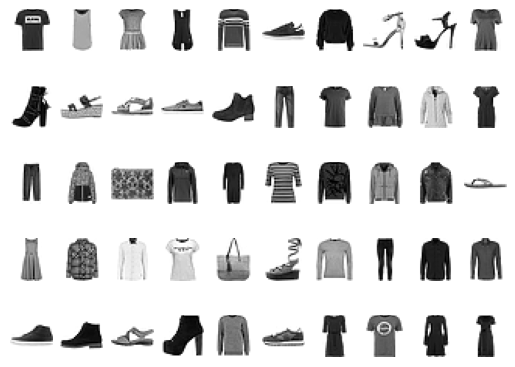

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images+1):
  plt.subplot(5, 10, index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap='gray_r')

Trouser Dress Sneaker Pullover Ankle boot Ankle boot Pullover Trouser


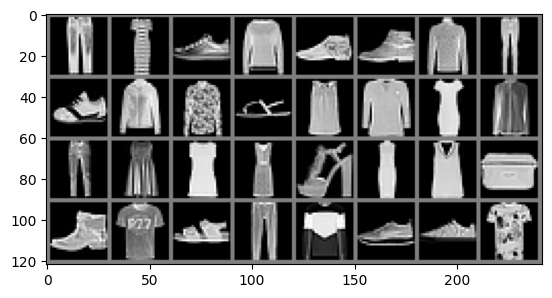

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 12 * 12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
epochs = 15

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Staring Epoch: {epoch+1}....')

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i%100==99:
      correct = 0
      total = 0

      with torch.no_grad():
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted==labels).sum().item()

        accuracy = 100 * correct / total
        epoch_num = epoch + 1
        actual_loss = running_loss / 50
        print(f'Epoch : {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print("Finished Training")

Staring Epoch: 1....
Epoch : 1, Mini-Batches Completed: 100, Loss: 2.307, Test Accuracy = 70.840%
Epoch : 1, Mini-Batches Completed: 200, Loss: 1.579, Test Accuracy = 72.060%
Epoch : 1, Mini-Batches Completed: 300, Loss: 1.357, Test Accuracy = 75.370%
Epoch : 1, Mini-Batches Completed: 400, Loss: 1.286, Test Accuracy = 73.730%
Epoch : 1, Mini-Batches Completed: 500, Loss: 1.275, Test Accuracy = 74.630%
Epoch : 1, Mini-Batches Completed: 600, Loss: 1.176, Test Accuracy = 78.560%
Epoch : 1, Mini-Batches Completed: 700, Loss: 1.120, Test Accuracy = 76.980%
Epoch : 1, Mini-Batches Completed: 800, Loss: 1.173, Test Accuracy = 79.460%
Epoch : 1, Mini-Batches Completed: 900, Loss: 1.056, Test Accuracy = 79.050%
Epoch : 1, Mini-Batches Completed: 1000, Loss: 1.071, Test Accuracy = 78.780%
Epoch : 1, Mini-Batches Completed: 1100, Loss: 1.015, Test Accuracy = 79.510%
Epoch : 1, Mini-Batches Completed: 1200, Loss: 1.025, Test Accuracy = 80.640%
Epoch : 1, Mini-Batches Completed: 1300, Loss: 0.992

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data

    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on 10,000 images is: {accuracy:.4}%')

Accuracy of the model on 10,000 images is: 91.45%


**Training Plots**

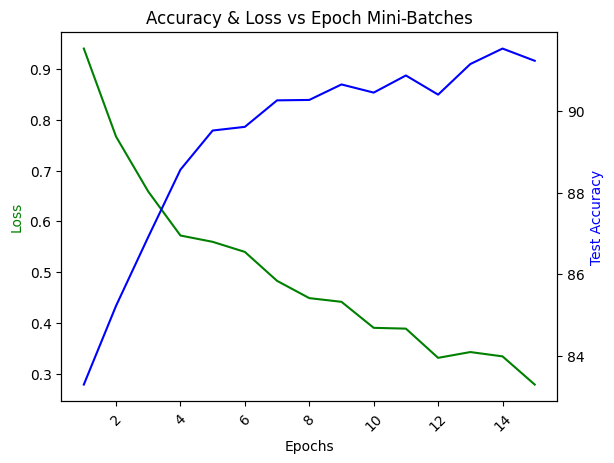

In [ ]:
fig, ax1 = plt.subplots()

plt.title('Accuracy & Loss vs Epoch Mini-Batches')
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

In [ ]:
PATH = './fashion_mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

**Visualizing Data Augmentation**

In [ ]:
import PIL

data_aug_transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=5),
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, interpolation=PIL.Image.BILINEAR),
    transforms.Grayscale(num_output_channels=1)
])

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showAugmentations(image, augmentations=6):
  fig = figure()
  for i in range(augmentations):
    a = fig.add_subplot(1, augmentations, i+1)
    img = data_aug_transform(image)
    imshow(img, cmap='Greys_r')
    plt.axis('off')

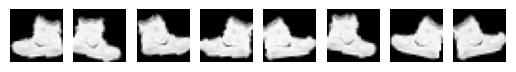

In [ ]:
image = trainset.data[0].numpy()

img_pil = PIL.Image.fromarray(image)

showAugmentations(img_pil, 8)